# Data importing

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/exams.csv")

In [3]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,79,75,81
1,female,group C,associate's degree,free/reduced,none,56,65,64
2,male,group D,bachelor's degree,standard,none,86,68,74
3,female,group A,bachelor's degree,standard,none,68,78,76
4,female,group D,high school,free/reduced,none,49,68,61


# Try to print the null values

In [4]:
df.isnull().values.any()

False

# Delete null values if any

In [5]:
df = df.dropna(how='any',axis=0)

# Correlated features check

In [6]:
df = pd.read_csv('data/pima-data.csv')

In [7]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


In [8]:
df.corr()    #if value is 1 it indicates corelated values

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


# Graphical view of corelated features 

In [9]:
import matplotlib.pyplot as plt

In [10]:
def plot_df(df,size=11):
    corr = df.corr()
    fig,ax = plt.subplots(figsize = (size,size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)),corr.columns)
    plt.yticks(range(len(corr.columns)),corr.columns)
    plt.show()

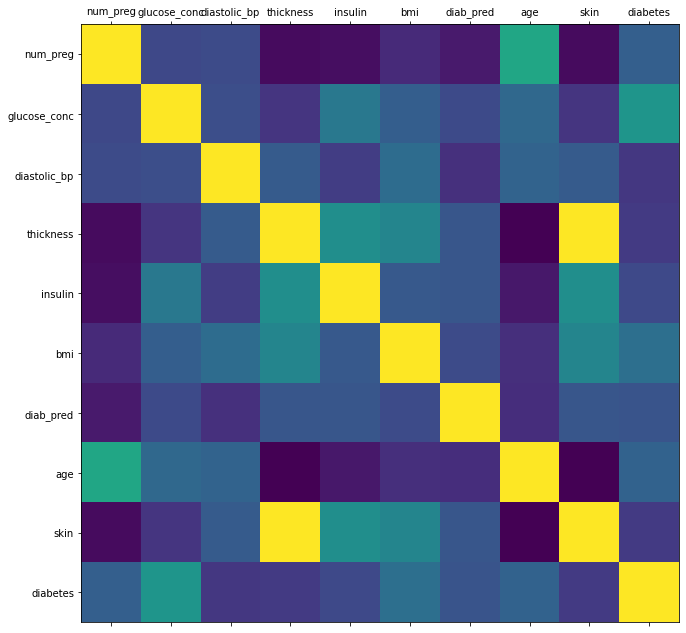

In [11]:
plot_df(df)

# delete correlated feature

In [12]:
del df['skin']

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


# Data molding

In [14]:
diab_map = {True:1,False:0}

In [15]:
df['diabetes'] = df['diabetes'].map(diab_map)

In [16]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Data Spliting

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
feature_column = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']  #independent variables
predicted_column = ['diabetes'] #dependent variables

In [19]:
X = df[feature_column].values
Y = df[predicted_column].values

In [20]:
split_size = 0.30  #30% test and 70% train

In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = split_size,random_state = 42)

In [22]:
print("train size : {0:0.2f}%".format(float(float(len(X_train))/float(len(df.index)))*100))

train size : 69.92%


In [23]:
print("test size : {0:0.2f}%".format(float(float(len(X_test))/float(len(df.index)))*100))

test size : 30.08%


# Impute missing data

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
fill_0 = SimpleImputer(missing_values = 0,strategy='mean')

In [30]:
X_train = fill_0.fit_transform(X_train)

In [31]:
Y_train = fill_0.fit_transform(Y_train)

# Data standartization

In [33]:
from sklearn import preprocessing
import pandas as pd

In [34]:
exam_data = pd.read_csv('data/exams.csv')

In [35]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,79,75,81
1,female,group C,associate's degree,free/reduced,none,56,65,64
2,male,group D,bachelor's degree,standard,none,86,68,74
3,female,group A,bachelor's degree,standard,none,68,78,76
4,female,group D,high school,free/reduced,none,49,68,61


# Scaling

In [38]:
exam_data[['math score']] = exam_data[['math score']].astype(float)
exam_data[['reading score']] = exam_data[['reading score']].astype(float)
exam_data[['writing score']] = exam_data[['writing score']].astype(float)

In [39]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,79.0,75.0,81.0
1,female,group C,associate's degree,free/reduced,none,56.0,65.0,64.0
2,male,group D,bachelor's degree,standard,none,86.0,68.0,74.0
3,female,group A,bachelor's degree,standard,none,68.0,78.0,76.0
4,female,group D,high school,free/reduced,none,49.0,68.0,61.0


In [42]:
exam_data[['math score']] = preprocessing.scale(exam_data[['math score']])
exam_data[['reading score']] = preprocessing.scale(exam_data[['reading score']])
exam_data[['writing score']] = preprocessing.scale(exam_data[['writing score']])

In [43]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,female,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,male,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,female,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,female,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


<AxesSubplot:ylabel='Density'>

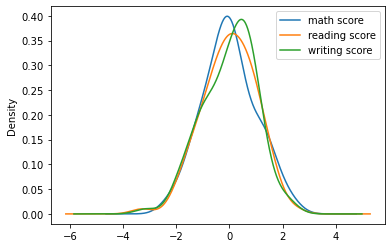

In [47]:
df_plot = exam_data[['math score','reading score','writing score']].copy()
df_plot.plot.kde()

# Label Encoding

In [50]:
le = preprocessing.LabelEncoder()

In [51]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,female,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,male,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,female,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,female,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


In [52]:
exam_data['gender'] = le.fit_transform(exam_data['gender'].astype(str))

In [53]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


In [54]:
print(le.classes_)

['female' 'male']


# One-hot encoding

In [55]:
exam_data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group E,associate's degree,standard,completed,0.994557,0.574138,1.049901
1,0,group C,associate's degree,free/reduced,none,-0.646391,-0.169564,-0.178476
2,1,group D,bachelor's degree,standard,none,1.493976,0.053547,0.544099
3,0,group A,bachelor's degree,standard,none,0.209756,0.797248,0.688613
4,0,group D,high school,free/reduced,none,-1.145810,0.053547,-0.395248


In [57]:
exam_data = pd.get_dummies(exam_data,columns = ['race/ethnicity','parental level of education','lunch','test preparation course'])

In [58]:
exam_data.head(5)

,gender,math score,reading score,writing score,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1,0.994557,0.574138,1.049901,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0
1,0,-0.646391,-0.169564,-0.178476,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1
2,1,1.493976,0.053547,0.544099,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1
3,0,0.209756,0.797248,0.688613,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1
4,0,-1.145810,0.053547,-0.395248,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1
